<a href="https://colab.research.google.com/github/lari-guimaraes/Portf-lio_Machine_Learning/blob/main/Detec%C3%A7%C3%A3o_de_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/fraud_dataset_example (1).csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df = df[['isFraud','isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00
101609,0,0,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97
101610,0,0,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00
101611,0,0,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43


In [5]:
# renomear colunas

colunas = {'isFraud':'fraude',
          'isFlaggedFraud':'super_fraude',
           'step':'tempo',
           'type':'tipo',
           'amount':'valor',
           'nameOrig':'cliente1',
           'oldbalanceOrg':'saldo_inicial_c1',
           'newbalanceOrig':'novo_saldo_c1',
           'nameDest':'cliente2',
           'oldbalanceDest':'saldo_inicial_c2',
           'newbalanceDest':'novo_saldo_c2'
    
}

In [6]:
df = df.rename(columns=colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [7]:
df.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [9]:
df.shape

(101613, 11)

In [10]:
df.info()

#se atentar aos tipos das variáveis, provavelmente as do tipo object irão precisar de tratamento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [11]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [12]:
df.isnull().values.any()

#não irá precisar de tratamento

False

In [ ]:
#pandas profiling

!pip install pandas_profiling
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(df)

In [14]:
#aplicando encoding na variável tipo

df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [15]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)
df.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [16]:
# Regressão Logistica

x = df.drop('fraude', axis=1)
y = df['fraude']

In [17]:
from sklearn.model_selection import train_test_split
#replicabilidade
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))


Acurácia:  0.9989765391276965
Precisão:  0.2
Recall:  0.043478260869565216
F1:  0.07142857142857142


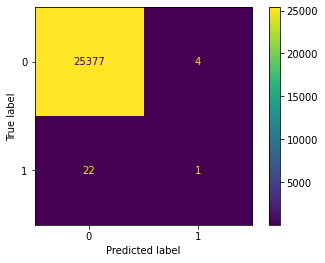

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


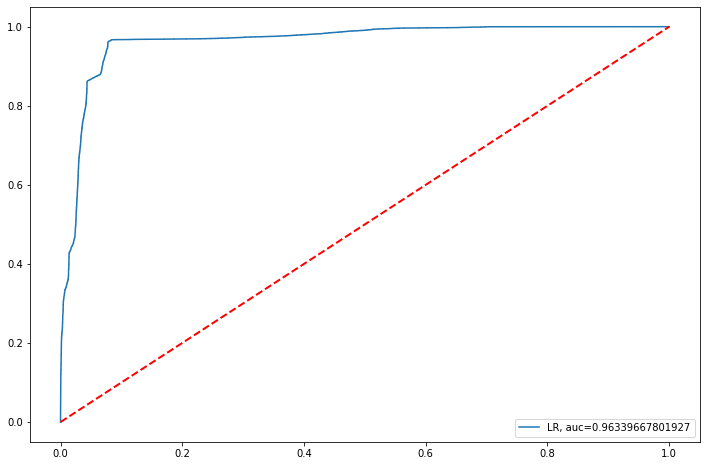

In [37]:
#Curva ROC
y_pred_proba = lr.predict_proba(x_test)[::,1]
#serve para construção da curva
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#plotagem
plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label ='LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [23]:
#balanceamento de dados

!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 9.1 MB/s 
     |████████████████████████████████| 199 kB 48.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [24]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 42

smote = SMOTE(random_state=42)


In [25]:
x = df.drop('fraude', axis =1)
y = df['fraude']

In [26]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [28]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [29]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

## Novo teste do LR

In [33]:
x = df_balanced.iloc[:,1:].values
y = df_balanced.iloc[:,0].values

In [34]:
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [35]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975


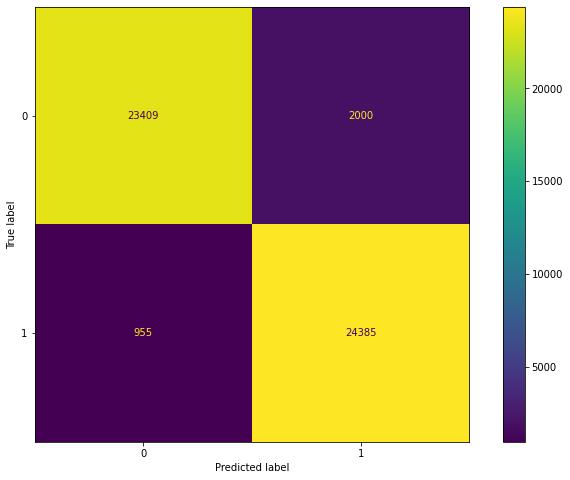

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

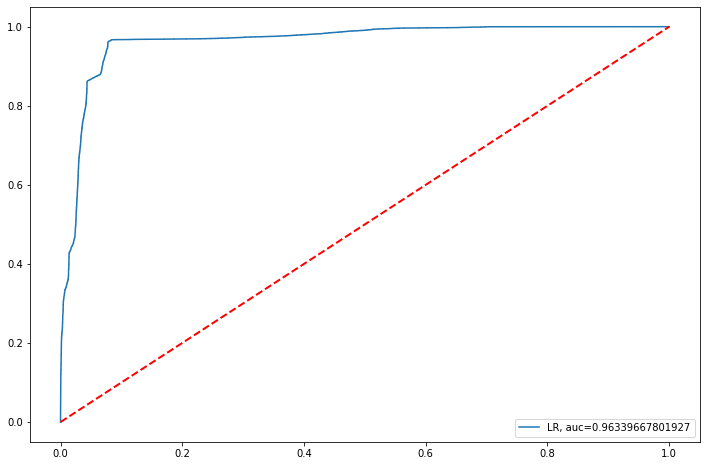

In [38]:
#Curva ROC
y_pred_proba = lr.predict_proba(x_test)[::,1]
#serve para construção da curva
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#plotagem
plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label ='LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# formulando as hipoteses

1. tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

2. o cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

3. o cliente paga as suas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude. 

## Árvore de Decisão

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5, random_state = SEED)



In [40]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943


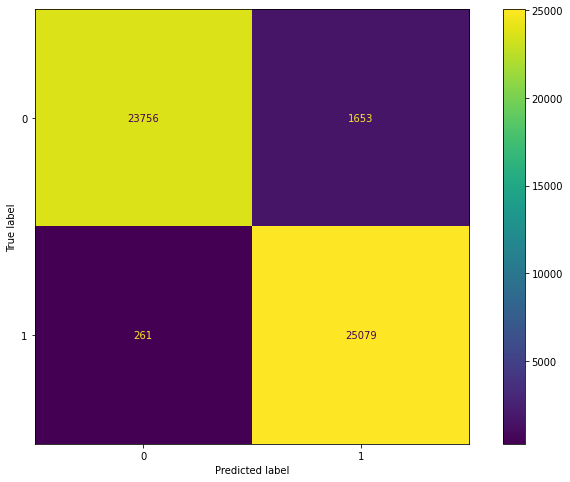

In [41]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

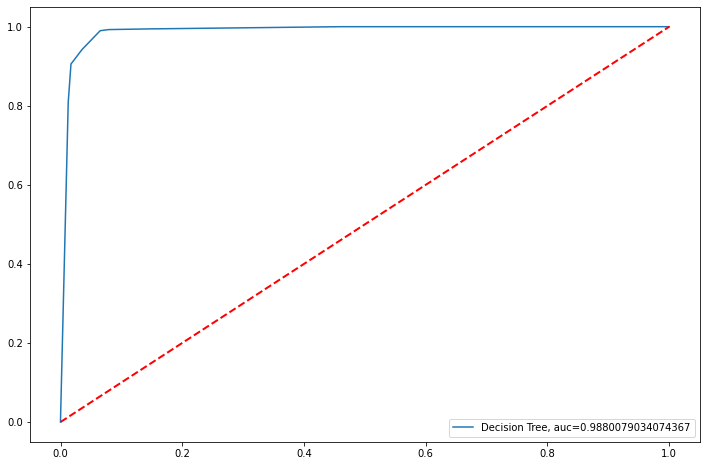

In [44]:
#Curva ROC
y_pred_proba = dt.predict_proba(x_test)[::,1]
#serve para construção da curva
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#plotagem
plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label ='Decision Tree, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# 100 árvores por default
rf = RandomForestClassifier(max_depth=5, random_state = SEED)

In [49]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisão: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))

Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


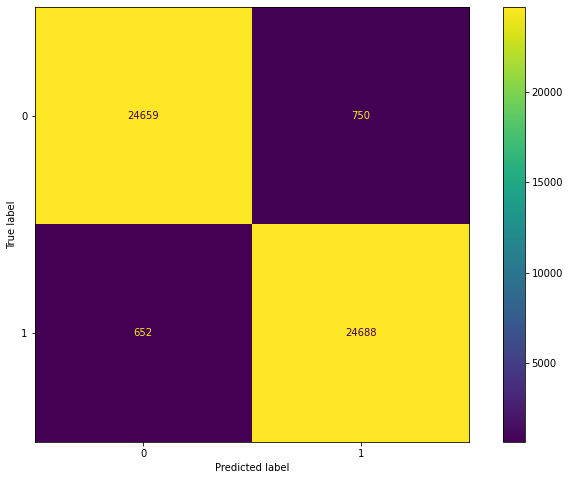

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

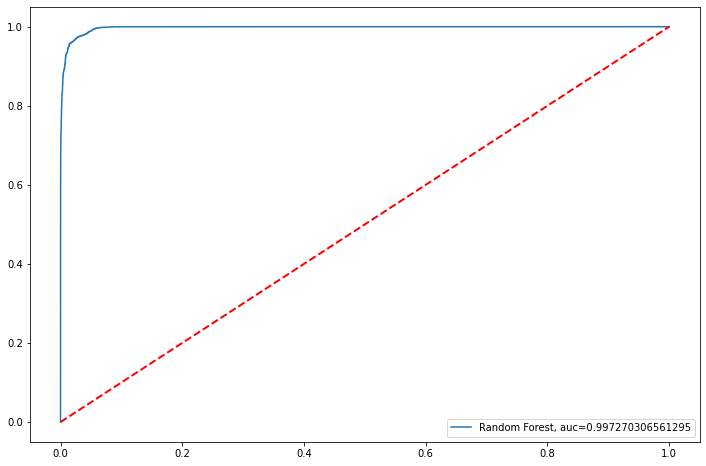

In [51]:
#Curva ROC
y_pred_proba = rf.predict_proba(x_test)[::,1]
#serve para construção da curva
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#plotagem
plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label ='Random Forest, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Análise de Métricas

In [52]:
classifiers = [
               LogisticRegression(max_iter=1000, random_state=SEED),
               DecisionTreeClassifier(max_depth=5, random_state=SEED),
               RandomForestClassifier(max_depth=5, random_state=SEED)]

LogisticRegression
****Resultados****
Acurácia:  0.9417722516699837
Precisão:  0.9241993556945234
Recall:  0.9623125493291239
F1:  0.9428709521507975
DecisionTreeClassifier
****Resultados****
Acurácia:  0.9622849711324362
Precisão:  0.9381639982043992
Recall:  0.9897000789265983
F1:  0.9632432017206943
RandomForestClassifier
****Resultados****
Acurácia:  0.9723738398786183
Precisão:  0.9705165500432424
Recall:  0.9742699289660616
F1:  0.9723896175509079


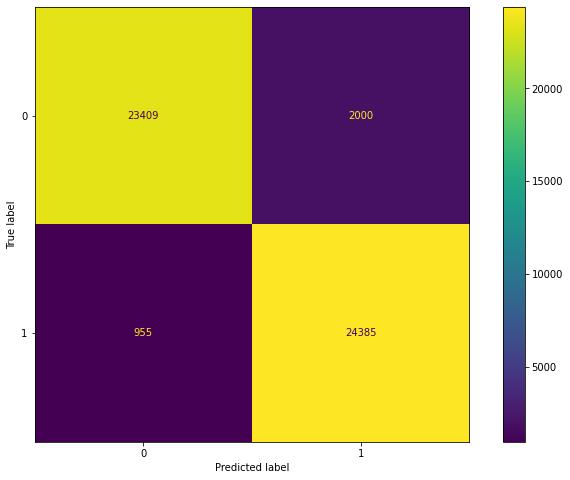

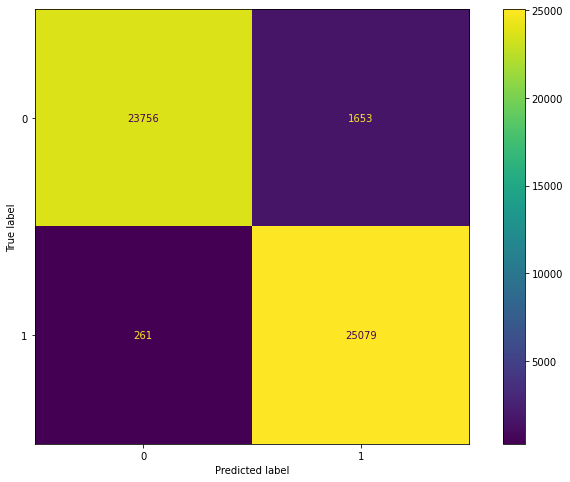

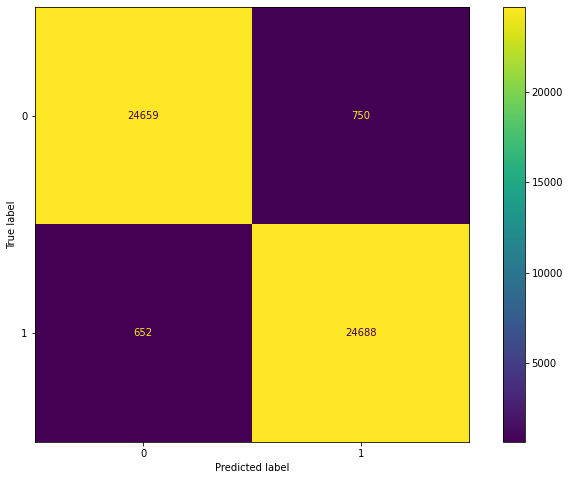

In [54]:
for clf in classifiers:
  clf.fit(x_train,y_train)
  name = clf.__class__.__name__
  print('='*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
  print('Precisão: ', metrics.precision_score(y_test, y_pred))
  print('Recall: ', metrics.recall_score(y_test, y_pred))
  print('F1: ', metrics.f1_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()